FICHA 1

Trabalho realizado por:

Duarte Castanheira      nº111211

Rafael Custódio         nº111112




Exercicio 1 - Geração de pontos 2D usando uma distribuição Gaussiana multivariada

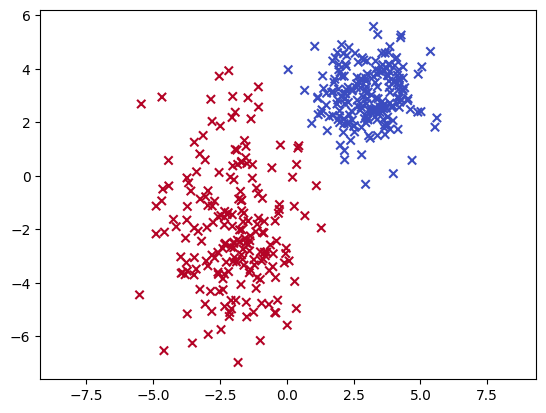

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import random

# primeiro conjunto de pontos
mean = [3, 3]    
cov = [[1, 0], [0, 1]] 
size = 200                 
a = np.random.multivariate_normal(mean, cov, size).T
labels_a = np.ones((1, size))  # label = 1

# segundo conjunto de pontos
mean = [-2, -2]
cov = [[2, 0], [0, 5]]    
b = np.random.multivariate_normal(mean, cov, size).T
labels_b = np.full((1, size), 2)  # label = 2

# junta coordenadas dos dois conjuntos e respetivas labels
a = np.concatenate((a, labels_a), axis=0)
b = np.concatenate((b, labels_b), axis=0)
c = np.concatenate((a, b), axis=1)

c = c.T
np.random.shuffle(c)
c = c.T

x = c[0]
y = c[1]
labels = c[2]

# gráfico dos pontos com cores diferentes
plt.scatter(x, y, c=labels, cmap='coolwarm', marker='x')
plt.axis('equal')
plt.show()

# guarda os dados num ficheiro
data = c.T
np.savetxt("conjunto.txt", data, fmt="%.5f %.5f %d",
           header="x y label", comments='')


Neste gráfico é possivel ver os dois conjuntos, A e B, a azul e vermelho respetivamente. Também é possivel observar que ambos os conjuntos estão dentro das suas médias e covariancias. 

Versão simples do Algoritmo K-Means

Ponto 1,2 e 3

Nestes primeiros 3 pontos implementamos  uma versão simples do algoritmo K-Means e corremos esse algoritmo durante 10 epocas. Neste algoritmo é necessario dar como input o numero de clusters que vamos querer como resultado. Neste caso são pedidos dois clusters.

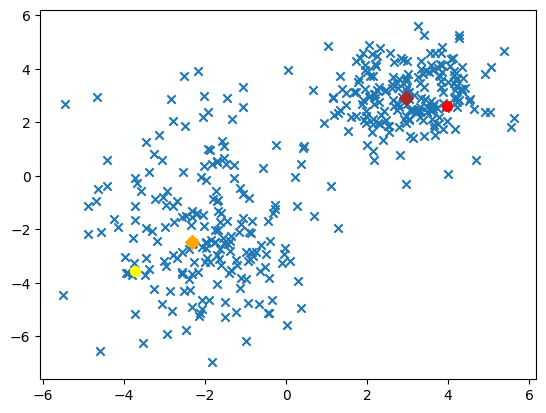

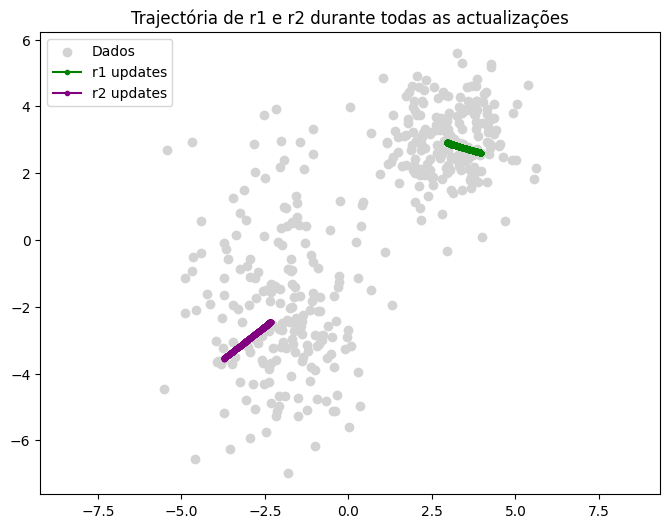

In [82]:
epoca=10
data = c[:2, :].T  # apenas x e y, shape (1000, 2)
alpha = 0.001 
r1 = data[np.random.randint(len(data))]
r2 = data[np.random.randint(len(data))]

history_updates = []  # guarda cada atualização de r1 ou r2
history_epochs = []   # guarda r1 e r2 no fim de cada época

plt.scatter(x, y, marker='x')
plt.scatter(r1[0], r1[1], color='red', s=50, label='r1 inicial')
plt.scatter(r2[0], r2[1], color='yellow', s=50, label='r2 inicial')
i=0
for i in range(epoca):
    
    for x_i in data:
        # calcula distâncias de x_i a r1 e r2
        d1 = np.linalg.norm(x_i - r1)
        d2 = np.linalg.norm(x_i - r2)
        history_updates.append(('r1', r1.copy()))

    # actualiza o mais próximo
        if d1 < d2:
            r1 = (1 - alpha) * r1 + alpha * x_i
            history_updates.append(('r1', r1.copy()))
        else:
            r2 = (1 - alpha) * r2 + alpha * x_i
            history_updates.append(('r2', r2.copy()))
    history_epochs.append((r1.copy(), r2.copy()))
    
# mostra posições finais
x = c[0]
y = c[1]

plt.scatter(r1[0], r1[1], color='brown', s=50, marker='D', label='r1 final')
plt.scatter(r2[0], r2[1], color='orange', s=50, marker='D', label='r2 final')


plt.figure(figsize=(8,6))
plt.scatter(c[0], c[1], c='lightgray', label='Dados')
r1_up = np.array([u[1] for u in history_updates if u[0]=='r1'])
r2_up = np.array([u[1] for u in history_updates if u[0]=='r2'])
plt.plot(r1_up[:,0], r1_up[:,1], '-o', markersize=3, color='green', label='r1 updates')
plt.plot(r2_up[:,0], r2_up[:,1], '-o', markersize=3, color='purple', label='r2 updates')
plt.title("Trajectória de r1 e r2 durante todas as actualizações")
plt.legend()
plt.axis('equal')
plt.show()



Pergunta 3

O que conclui sobre a evolução dos pontos nas diferentes situações?
No ponto i) é visível todas as mudanças de r1 e r2, o que visivelmente torna impossível uma compreensão do que está a acontecer. No entanto no ii) ao só mostrarmos o final de cada época conseguimos perceber as mudanças finais que o algoritmo alcança.

 Há alguma relação entre os valores dos representantes(r1 e r2) e os parâmetros usados na geração dos conjuntos?
 Os representantes 𝑟1 e r2 tendem a convergir para os centros dos clusters originais. A sua posição final reflete a média, dispersão e sobreposição dos dados usados na geração dos conjuntos.

Ponto 4, 5

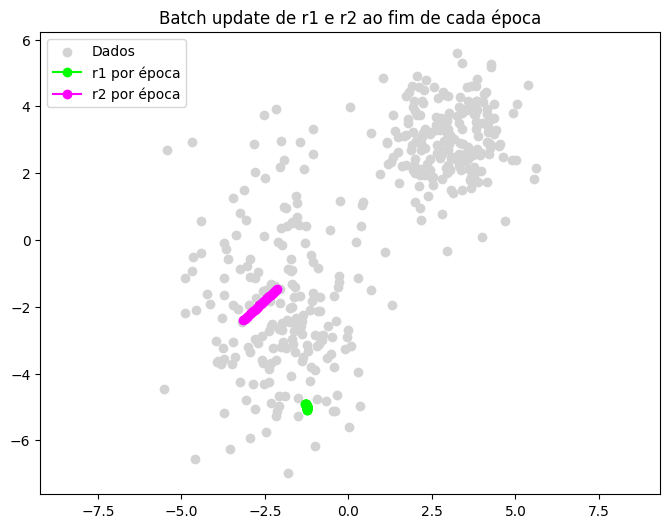

In [83]:
epoca=30
alpha = 0.01
r1 = data[np.random.randint(len(data))].copy()
r2 = data[np.random.randint(len(data))].copy()

history_updates = []   
history_epochs = [] 

for i in range(epoca):
    
    d_r1 = np.zeros(2)
    d_r2 = np.zeros(2)
    n_r1 = 0 
    n_r2 = 0

    for x_i in data:
        d1 = np.linalg.norm(x_i - r1)
        d2 = np.linalg.norm(x_i - r2)

        if d1 < d2:
            d_r1 += (x_i - r1)
            n_r1 += 1
        else:
            d_r2 += (x_i - r2)
            n_r2 += 1

    # Actualização batch no fim da época
    if n_r1 > 0:
        r1 = r1 + (alpha / n_r1) * d_r1
    if n_r2 > 0:
        r2 = r2 + (alpha / n_r2) * d_r2

    # Guarda histórico
    history_epochs.append((r1.copy(), r2.copy()))

# --- Gráfico final ---
plt.figure(figsize=(8,6))
plt.scatter(c[0], c[1], c='lightgray', label='Dados')
r1_ep = np.array([e[0] for e in history_epochs])
r2_ep = np.array([e[1] for e in history_epochs])
plt.plot(r1_ep[:,0], r1_ep[:,1], '-o', markersize=6, color='lime', label='r1 por época')
plt.plot(r2_ep[:,0], r2_ep[:,1], '-o', markersize=6, color='magenta', label='r2 por época')
plt.title("Batch update de r1 e r2 ao fim de cada época")
plt.legend()
plt.axis('equal')
plt.show()

Neste gráfico é possivel ver que os pontos r1 e r2 se vão aproximando do "centro" mais unifiormemente. Este algoritmo é melhor que o algoritmo do ponto 3

Ponto 6

Neste ponto vemos se os clusters formados são uma boa forma de separar os dois conjuntos inicias.

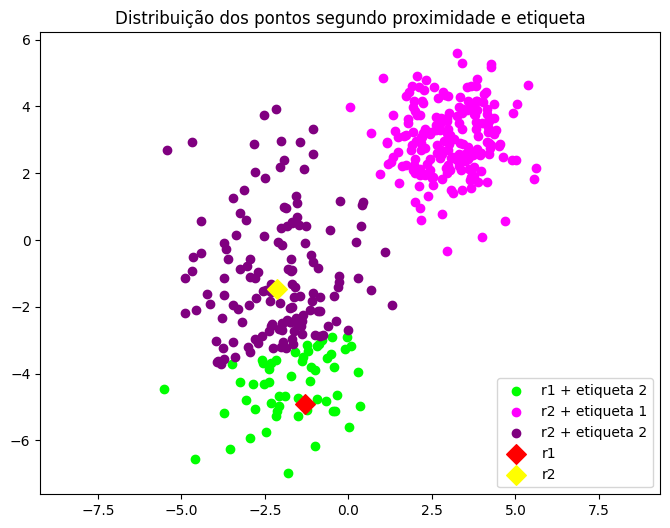

In [84]:
data = c[:2, :].T
labels = c[2]
r1_label1 = []
r1_label2 = []
r2_label1 = []
r2_label2 = []

for i, x_i in enumerate(data):
    d1 = np.linalg.norm(x_i - r1)
    d2 = np.linalg.norm(x_i - r2)

    if d1 < d2:
        if labels[i] == 1:
            r1_label1.append(x_i)
        else:
            r1_label2.append(x_i)
    else:
        if labels[i] == 1:
            r2_label1.append(x_i)
        else:
            r2_label2.append(x_i)

r1_label1 = np.array(r1_label1)
r1_label2 = np.array(r1_label2)
r2_label1 = np.array(r2_label1)
r2_label2 = np.array(r2_label2)

plt.figure(figsize=(8,6))
if len(r1_label1) > 0:
    plt.scatter(r1_label1[:,0], r1_label1[:,1], color='green', label='r1 + etiqueta 1')
if len(r1_label2) > 0:
    plt.scatter(r1_label2[:,0], r1_label2[:,1], color='lime', label='r1 + etiqueta 2')
if len(r2_label1) > 0:
    plt.scatter(r2_label1[:,0], r2_label1[:,1], color='magenta', label='r2 + etiqueta 1')
if len(r2_label2) > 0:
    plt.scatter(r2_label2[:,0], r2_label2[:,1], color='purple', label='r2 + etiqueta 2')

# Mostra os protótipos
plt.scatter(r1[0], r1[1], color='red', s=100, marker='D', label='r1')
plt.scatter(r2[0], r2[1], color='yellow', s=100, marker='D', label='r2')

plt.title("Distribuição dos pontos segundo proximidade e etiqueta")
plt.legend()
plt.axis('equal')
plt.show()

É possível concluir através deste gráfico que os pontos se encontram maioritariamente nos seus respetivos clusters. As exceções ocorrem devido à interseção entre os conjuntos a e b, onde alguns pontos ficam próximos de outro cluster ou são classificados como ruído, mas, fora dessas regiões de sobreposição, os clusters estão bem definidos e representam corretamente a distribuição dos dados.

Ponto 7

Neste ponto corremos o algoritmo anterior 30 vezes.

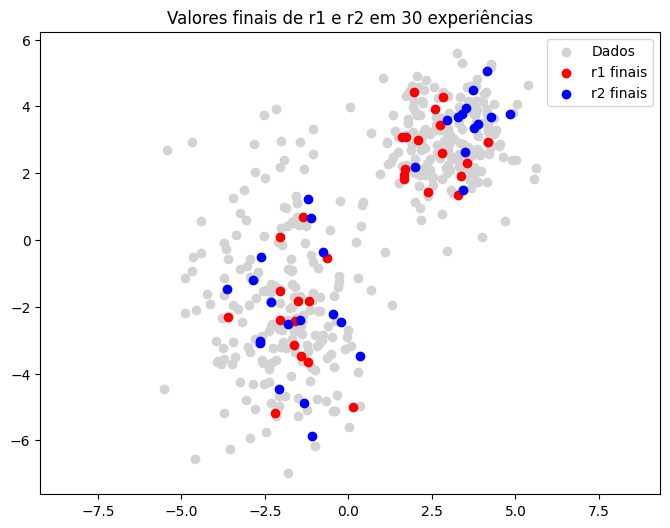

In [85]:
epoca = 10
alpha = 0.01
experiment = 30
data = c[:2, :].T
labels = c[2]

# Listas para guardar resultados finais
final_r1 = []
final_r2 = []

for exp in range(experiment):
    # Inicializa r1 e r2 aleatoriamente
    r1 = data[np.random.randint(len(data))].copy()
    r2 = data[np.random.randint(len(data))].copy()
    
    # Batch update
    for i in range(epoca):
        d_r1 = np.zeros(2)
        d_r2 = np.zeros(2)
        n_r1 = 0
        n_r2 = 0
        
        for x_i in data:
            d1 = np.linalg.norm(x_i - r1)
            d2 = np.linalg.norm(x_i - r2)
            if d1 < d2:
                d_r1 += (x_i - r1)
                n_r1 += 1
            else:
                d_r2 += (x_i - r2)
                n_r2 += 1
        
        if n_r1 > 0:
            r1 = r1 + (alpha / n_r1) * d_r1
        if n_r2 > 0:
            r2 = r2 + (alpha / n_r2) * d_r2
    
    # Guarda resultados finais
    final_r1.append(r1.copy())
    final_r2.append(r2.copy())

# Converte para arrays numpy
final_r1 = np.array(final_r1)
final_r2 = np.array(final_r2)

# --- Gráfico 1: pontos finais sobre o conjunto ---
plt.figure(figsize=(8,6))
plt.scatter(data[:,0], data[:,1], c='lightgray', label='Dados')
plt.scatter(final_r1[:,0], final_r1[:,1], color='red', label='r1 finais')
plt.scatter(final_r2[:,0], final_r2[:,1], color='blue', label='r2 finais')
plt.title("Valores finais de r1 e r2 em 30 experiências")
plt.legend()
plt.axis('equal')
plt.show()


Neste gráfico é possivel verificar que, após as 30 experiencias, os pontos finais encontram-se aleatoriamente no conjunto. Assim, podemos concluit que a escolha dos pontos iniciais r1 e r2 influenciam muito o resultado final.

Exercicio 2

 Neste exercicio foi implementada uma versão simplificada de clustering aglomerataivo hierárquico. comparando com o exercicio 1, será possivel concluir que este algoritmo não é bom para conjuntos muito grandes pois demora muito tempo.

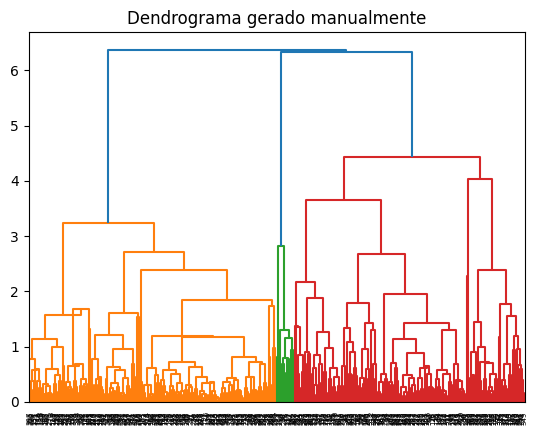

In [86]:
from scipy.cluster.hierarchy import dendrogram


clusters = c[:2, :].T
history = [clusters.copy()]

Z = []
next_idx = len(clusters)  # índice para novos clusters
ids = list(range(len(clusters)))  # IDs atuais

while len(clusters) > 1:
    min_dist = np.inf
    idx1, idx2 = -1, -1
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            d = np.linalg.norm(clusters[i] - clusters[j])
            if d < min_dist:
                min_dist = d
                idx1, idx2 = i, j

    # Substitui os dois pontos pela média
    mean_point = (clusters[idx1] + clusters[idx2]) / 2

    # Número de elementos (simplificado: 2)
    n_elements = 2

    # Guarda fusão (IDs corretos)
    Z.append([ids[idx1], ids[idx2], min_dist, n_elements])

    # Atualiza clusters e IDs
    clusters = np.delete(clusters, [idx1, idx2], axis=0)
    clusters = np.vstack([clusters, mean_point])

    # O novo cluster ganha um novo ID
    new_id = next_idx
    next_idx += 1

    # Remove os IDs antigos e adiciona o novo
    ids = [id_ for k, id_ in enumerate(ids) if k not in (idx1, idx2)]
    ids.append(new_id)

    history.append(clusters.copy())

# Converte para array (float) e desenha dendrograma
Z = np.array(Z, dtype=float)
dendrogram(Z)
plt.title("Dendrograma gerado manualmente")
plt.show()

O dendrograma mostra a sequência das combinações entre os pontos, agrupando primeiro os mais próximos e formando progressivamente clusters maiores até restar apenas um. As alturas das ligações indicam as distâncias a que cada fusão ocorreu.

Exercicio 3

Neste exercicio foi implementada uma versão simples de agrupamento por densidade. Este algoritmo tem dois inputs, eps e minPts, e não precisa de o numero de clusters à partida.

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

data = c[:2, :].T  # dados 2D
n = len(data)
eps = 0.5
min_pts_list = [4, 6, 20]  # valores de minPts a testar


def dbscan_frames(min_pts):
    # Gera as etapas (frames) do DBSCAN
    frames = []
    labels = np.zeros(n, dtype=int)
    cluster_id = 0

    for i in range(n):
        if labels[i] != 0:
            continue
        distances = np.linalg.norm(data - data[i], axis=1)
        neighbors = np.where(distances <= eps)[0]

        if len(neighbors) < min_pts:  # ponto de ruído
            labels[i] = -1
            continue

        cluster_id += 1
        labels[i] = cluster_id
        frames.append((labels.copy(), i, cluster_id))

        # expansão do cluster
        j = 0
        while j < len(neighbors):
            p = neighbors[j]
            if labels[p] == -1:
                labels[p] = cluster_id
            if labels[p] == 0:
                labels[p] = cluster_id
                distances_p = np.linalg.norm(data - data[p], axis=1)
                neighbors_p = np.where(distances_p < eps)[0]
                if len(neighbors_p) >= min_pts:
                    neighbors = np.concatenate((neighbors, neighbors_p))
            j += 1
        frames.append((labels.copy(), i, cluster_id))

    frames.append((labels.copy(), -1, cluster_id))  # estado final
    return frames


def criar_interface(min_pts):
    # Cria o gráfico interativo para um dado minPts
    frames = dbscan_frames(min_pts)

    slider = widgets.IntSlider(
        value=len(frames)-1, min=0, max=len(frames)-1, step=1,
        description=f'minPts={min_pts}', continuous_update=False
    )
    out = widgets.Output()

    def mostrar_frame(f):
        with out:
            clear_output(wait=True)
            labels, i, cluster_id = frames[f]
            plt.figure(figsize=(5.5,5.5))
            plt.scatter(data[:,0], data[:,1], color='lightgray', s=20)
            for k in range(1, cluster_id+1):
                plt.scatter(data[labels==k,0], data[labels==k,1], s=40, label=f'Cluster {k}')
            plt.scatter(data[labels==-1,0], data[labels==-1,1], color='black', s=15, label='Ruído')
            plt.scatter(data[i,0], data[i,1], color='red', s=100, marker='x', label=f'Novo cluster {cluster_id}')
            plt.legend()
            plt.axis('equal')
            plt.grid(alpha=0.3)
            plt.title(f"Resultado final — minPts={min_pts}" if f == len(frames)-1 else f"Fase {f+1}/{len(frames)} — minPts={min_pts}")
            plt.show()

    # botões anterior/seguinte
    btn_prev = widgets.Button(description="⟵ Anterior")
    btn_next = widgets.Button(description="Seguinte ⟶")

    btn_prev.on_click(lambda b: slider.set_trait('value', slider.value - 1 if slider.value > 0 else 0))
    btn_next.on_click(lambda b: slider.set_trait('value', slider.value + 1 if slider.value < len(frames)-1 else len(frames)-1))
    slider.observe(lambda change: mostrar_frame(change['new']), names='value')

    display(widgets.VBox([widgets.HBox([btn_prev, slider, btn_next]), out]))
    mostrar_frame(len(frames)-1)


# mostra as três versões interativas
for m in min_pts_list:
    criar_interface(m)

Como é possivel ver pelos gráficos, a escolha dos inputs eps (distancia máxima entre dois pontos para estes serem vizinhos) e minPts(pontos minimos a distancia eps para se formar um cluster) influencia bastante o resultado final. Assim é necessário ter cuidado na escolha destes inputs. Para minPts=20, é possivel ver que só um cluster foi criado significando que um minPts=20, neste caso, pode não ser a melhor escolha(dependendo do eps).